**Muqing Wen, Leo Qian**

Spring 2023

CS 443: Bio-inspired Machine Learning

#### Week 3: Train decoders to classify MNIST from Hebbian network activations

# Project 1: Hebbian Learning

You will use your linear and nonlinear decoders to predict the digit classification accuracy on MNIST based on the learned Hebbian representation (i.e. weights) that you saved last week.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

import time

from mnist import get_mnist
from hebb_net import HebbNet

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.show()
plt.rcParams.update({'font.size': 18})

np.set_printoptions(suppress=True, precision=3)

%load_ext autoreload
%autoreload 2

## Task 5: Train and test decoders on MNIST

### 5a. Preparing decoder inputs

In the cell below:
- load the raw MNIST train/test/validation samples. Reserve 2000 training samples for validation.
- process them with your the Hebbian network (i.e. compute their corresponding netIn values) to get the input for your decoders.
- Cast each of the train/test/validation values to the `tf.float32` datatype.

**Tips:**
- Your Hebbian network constructor has a keyword argument that you can use to load wts from a previously trained network. You should not need to retrain your Hebbian network!
- When creating your Hebbian network object, remember to build it with the same hyperparameters as you did last week (e.g. number of neurons).

In [2]:
x_train, y_train, x_test, y_test, x_val, y_val = get_mnist(2000)

y_train = tf.Variable(y_train,dtype=tf.int64)
x_test = tf.Variable(x_test,dtype=tf.float32)
y_test = tf.Variable(y_test,dtype=tf.int64)
y_val = tf.Variable(y_val,dtype=tf.int64)

M = x_train.shape[1]
H = 500
net = HebbNet(M, H, kth_place_inhibited=6, load_wts=True)

x_train = net.net_in(x_train)
x_val = net.net_in(x_val)

x_train = tf.Variable(x_train,dtype=tf.float32)
x_val = tf.Variable(x_val,dtype=tf.float32)

### 5b. Linear decoder

Train your softmax classifier on the Hebbian network `net_in` activations obtained from processing the MNIST training set. The hyperparameters are up to you, but you should generally make principled choices (see question below).

#### Guidelines

- Training should be fairly quick (no more than a few minutes).
- Make use of the validation set to monitor progress while training.
- **Remember:** you are **NOT** training the softmax classifier **on MNIST** — you are training it on the `net_in` values produced by the Hebbian network that you trained above!
- Checking the validation accuracy too frequently will slow down training, but if you check too infrequently you won't know what's going on.


#### Results

Here are the items that you should report in the cell(s) below:

- Accuracy of the softmax classifier on the test set.
- Create a well-labeled plot showing the training and validation loss over epochs (*note: because you likely did not check validation loss on each epoch, but "x" epoch values for each loss will likely be different. Account for this when generating "x" values used in the plot.*).

In [3]:
from neural_decoder import SoftmaxDecoder

In [4]:
net_001 = SoftmaxDecoder(num_features=H, num_classes=np.unique(y_val).shape[0], wt_stdev=0.1)

In [5]:
train_loss_hist, val_loss_hist, num_epochs = net_001.fit(x_train, y_train, x_val=x_val, y_val=y_val, mini_batch_sz=512, lr=1e-4, max_epochs=500, patience=10, val_every=10,
            verbose=True)

Starting to train network ....
Epoch 0/500, Training Loss: 10.83, Val loss: 10.63, Val acc: 11.90%.

Epoch 10/500, Training Loss: 0.70, Val loss: 0.78, Val acc: 76.40%.

Epoch 20/500, Training Loss: 0.56, Val loss: 0.59, Val acc: 82.95%.

Epoch 30/500, Training Loss: 0.52, Val loss: 0.51, Val acc: 85.30%.

Epoch 40/500, Training Loss: 0.48, Val loss: 0.47, Val acc: 86.30%.

Epoch 50/500, Training Loss: 0.44, Val loss: 0.45, Val acc: 86.60%.

Epoch 60/500, Training Loss: 0.35, Val loss: 0.43, Val acc: 87.50%.

Epoch 70/500, Training Loss: 0.38, Val loss: 0.42, Val acc: 87.60%.

Epoch 80/500, Training Loss: 0.36, Val loss: 0.41, Val acc: 88.10%.

Epoch 90/500, Training Loss: 0.35, Val loss: 0.40, Val acc: 88.40%.

Epoch 100/500, Training Loss: 0.34, Val loss: 0.39, Val acc: 88.40%.

Epoch 110/500, Training Loss: 0.41, Val loss: 0.39, Val acc: 88.35%.

Epoch 120/500, Training Loss: 0.34, Val loss: 0.39, Val acc: 88.25%.

Epoch 130/500, Training Loss: 0.35, Val loss: 0.38, Val acc: 88.95%.

In [39]:
print(len(train_loss_hist))
print(len(train_loss_hist)/(x_train.shape[0]/512))
print((len(val_loss_hist)))
print(len(list(np.arange(len(val_loss_hist))* 10)))

49959
441.01737931034484
45
45


In [61]:
def plot_train_valid_loss(train_loss, valid_loss, title="Training and Validation Loss", acc_freq=None, n_samps=None,
                       batch_sz=None):
    x_train = []
    
    for i in range(len(train_loss)):
        i_epoch = int(i/ (n_samps / batch_sz))
        x_train.append(i_epoch)
    
    # print(x_train)
        
    x_valid = list(np.arange(len(valid_loss))* acc_freq)

    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 9))

    axes.plot(x_train, train_loss, ".b-", markersize=10, label="Train Loss")
    axes.plot(x_valid, valid_loss, ".r-", markersize=10, label="Valid Loss")

    # Axes.set_xlabel(xlabel)
    axes.set_xlabel("Training Epochs")
    axes.set_ylabel("Loss")

    # axes.set_xticks(x_list)
    axes.set_xticklabels(axes.get_xticks(), rotation=0)

    # frameon: Whether the legend should be drawn on a patch (frame).
    axes.legend(loc="lower left", bbox_to_anchor=(1, 0), frameon=True, edgecolor="black")

    axes.set_title(title)
    plt.show()

C:\Users\wenmu\AppData\Local\Temp\ipykernel_26320\2888732660.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(axes.get_xticks(), rotation=0)


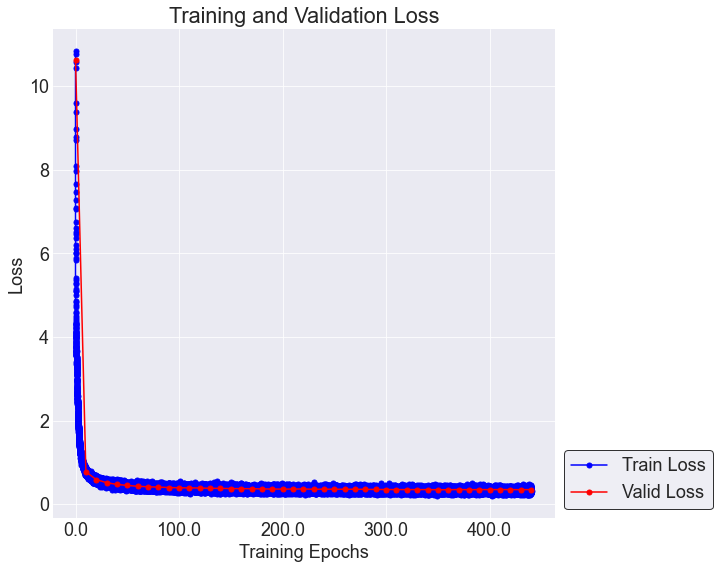

In [62]:
plot_train_valid_loss(train_loss_hist, val_loss_hist, acc_freq=10, n_samps=x_train.shape[0], batch_sz=512)

### 5c. Nonlinear decoder

Repeat what you did for the softmax classifier with the nonlinear classifier.

**Note there is one additional step:** Once you get the Hebbian network `net_in` values for the train/validation/test sets, the nonlinear decoding network proposed by Krotov & Hopfield (2019) assumes that the Hebbian network `net_in` values ($h_{ij}$) that serve as the input to the decoder are transformed by the following activation function:

$$x_{ij} = max(h_{ij}, 0)^n$$

where $h_{ij}$ are the Hebbian network `net_in` values. In other words, apply ReLU to the `net_in` values then raise the result to the power `n`. By default, we assume that the hyperparameter $n=5$.

**This additional ReLU step needs to be performed on the `net_in` values representing each of the decoder train/validation/test sets!!**


#### Guidelines

- Training should be fairly quick, but it might take a few minutes longer than the softmax network due to the added complexity.
- The max epochs will need to be set much higher than for the softmax decoder (at least several thousand).
- You likely will need different hyperparameter values here than the softmax network.
- Try using the default $\beta = 0.005$ and $m = 6$ (loss function exponent) hyperparameter values.

In [53]:
from neural_decoder import NonlinearDecoder

In [54]:
def preprocess_nonlinear(x, n=5):
    x = tf.nn.relu(x)**n
    return x

In [56]:
x_train, y_train, x_test, y_test, x_val, y_val = get_mnist(2000)

y_train = tf.Variable(y_train,dtype=tf.int64)
x_test = tf.Variable(x_test,dtype=tf.float32)
y_test = tf.Variable(y_test,dtype=tf.int64)
y_val = tf.Variable(y_val,dtype=tf.int64)

M = x_train.shape[1]
H = 500
net = HebbNet(M, H, kth_place_inhibited=6, load_wts=True)

x_train = net.net_in(x_train)
x_val = net.net_in(x_val)

x_train = tf.Variable(x_train,dtype=tf.float32)
x_val = tf.Variable(x_val,dtype=tf.float32)

In [57]:
# preprocess and decode
net_002 =  NonlinearDecoder(num_features=H, num_classes=np.unique(y_val).shape[0], wt_stdev=0.1,beta=0.005,loss_exp=6)

x_train = preprocess_nonlinear(x_train)
x_val = preprocess_nonlinear(x_val)
train_loss_hist_2, val_loss_hist_2, num_epochs_2 = net_002.fit(x_train, y_train, x_val=x_val, y_val=y_val, mini_batch_sz=512, lr=1e-4, max_epochs=500, patience=10, val_every=10,
            verbose=True)

Starting to train network ....
Epoch 0/500, Training Loss: 155701.34, Val loss: 605861.88, Val acc: 10.00%.

Epoch 10/500, Training Loss: 22538.15, Val loss: 89558.64, Val acc: 39.20%.

Epoch 20/500, Training Loss: 16108.20, Val loss: 61603.80, Val acc: 60.15%.

Epoch 30/500, Training Loss: 13965.98, Val loss: 54606.57, Val acc: 65.05%.

Epoch 40/500, Training Loss: 12150.57, Val loss: 47279.46, Val acc: 70.20%.

Epoch 50/500, Training Loss: 8724.40, Val loss: 33322.25, Val acc: 80.10%.

Epoch 60/500, Training Loss: 8502.18, Val loss: 30779.55, Val acc: 82.75%.

Epoch 70/500, Training Loss: 8062.03, Val loss: 29297.20, Val acc: 82.95%.

Epoch 80/500, Training Loss: 7691.91, Val loss: 28047.41, Val acc: 83.50%.

Epoch 90/500, Training Loss: 6585.68, Val loss: 26985.90, Val acc: 83.70%.

Epoch 100/500, Training Loss: 6562.50, Val loss: 26745.71, Val acc: 84.50%.

Epoch 110/500, Training Loss: 6527.54, Val loss: 26139.96, Val acc: 84.25%.

Epoch 120/500, Training Loss: 5122.50, Val loss: 

C:\Users\wenmu\AppData\Local\Temp\ipykernel_26320\2888732660.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(axes.get_xticks(), rotation=0)


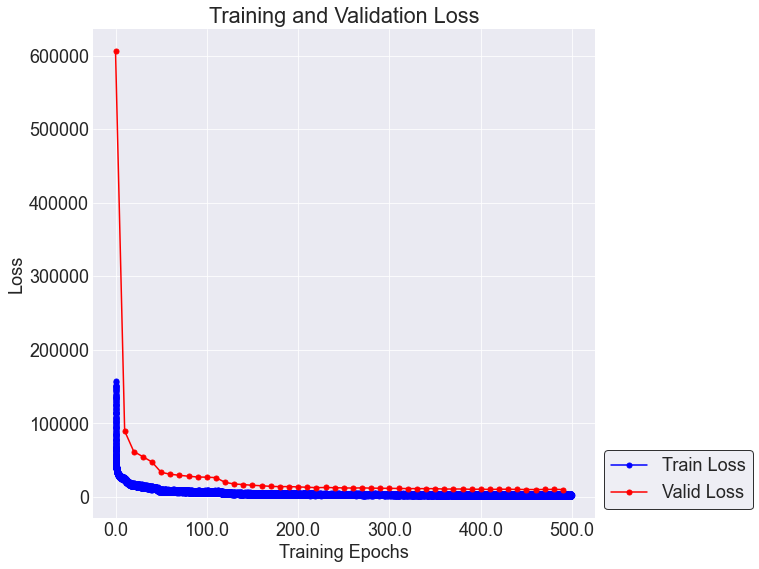

In [58]:
plot_train_valid_loss(train_loss_hist_2, val_loss_hist_2, acc_freq=10, n_samps=x_train.shape[0], batch_sz=512)

In [ ]:
net_001 = SoftmaxDecoder(num_features=H, num_classes=np.unique(y_val).shape[0], wt_stdev=0.1)
train_loss_hist, val_loss_hist, num_epochs = net_001.fit(x_train, y_train, x_val=x_val, y_val=y_val, 
                                                         mini_batch_sz=512, lr=1e-4, max_epochs=500, 
                                                         patience=10, val_every=10, verbose=True)

net_002 =  NonlinearDecoder(num_features=H, num_classes=np.unique(y_val).shape[0], wt_stdev=0.1,
                            beta=0.005,loss_exp=6)
x_train = preprocess_nonlinear(x_train)
x_val = preprocess_nonlinear(x_val)
train_loss_hist_2, val_loss_hist_2, num_epochs_2 = net_002.fit(x_train, y_train, x_val=x_val, y_val=y_val, 
                                                               mini_batch_sz=512, lr=1e-4, max_epochs=500, 
                                                               patience=10, val_every=10, verbose=True)

### 5d. Questions

**Question 9:** Reflect on the relative performance of the linear and nonlinear decoders. In at least one paragraph, compare and contrast pros/cons. 

**Question 10:** Explain your reasoning for picking the hyperparameters that you did for either decoder.

**Question 11:** Which decoder requires more epochs to train until the validation loss/accuracy plateaus? Why do you think that is?

**Answer 9:** 
<br> When we use the Softmax (linear) decoder, the validation loss tend to be very close to the training loss; but the validation accuracy can not get much higher than 89%.
<br> When we use the Nonlinear decoder, the validation loss is always higher than the training loss; but the validation accuracy can get to 95% much faster than when we use the Softmax decoder.

**Answer 10:** 
<br> For both the linear and non-linear decoders, we set:
<br> - wt_stdev = 0.1 (default)
<br> - mini batch size = 512 (default)
<br> - learning rate = 1 x 10^-4 (default) --- The Adam optimizer should be able to adjust the learning rate, so we can set the learning rate to be a small number.
<br> - max epoch = 500 --- The validation accuracy changes very slowly after 500 epochs, so, to save time, we set the maximum number of epochs to be 500.
<br> - patience = 10 --- This patience value is relatively high, thus making sure that the learning process will not terminate until the loss plateaus (or the maximum number of epochs has been reached).
<br> - val_every = 10 --- the validation loss and accuracy are computed every 10 epochs, preventing the fit method from computing validation loss/accuracy too frequently.

**Answer 11:**
<br> The nonlinear decoder requires more epochs to train until the validation loss/accuracy plateaus. This is because the nonlinear network activation function created more variation in the netAct values (by using the tanh(x) function), the nonlinear decoder also amplified the loss by the "loss exponent", making the losses significantly larger than the linear decoder.
<br> As a result, the nonlinear decoder takes longer to converge; but it will eventually achieve better accuracy than the linear decoder.

## Extensions

### 0. Compare encoder-decoder model to end-to-end training

Compare how accurately the linear and nonlinear decoders learn from raw MNIST samples compared to from the Hebbian network activations (*I would suggest keeping hyperparameters constant for a fair comparison*). There is a lot to explore here! Here are a few questions to examine:
- How rapidly the decoders networks learn their inputs (e.g. number of training epochs needed to achieve "good" accuracy on the validation set)?
- What is the best test accuracy achieved by the decoders networks with the same hyperparameters?
- How does the decoder training times compare with the Hebbian inputs vs raw MNIST samples to achieve some level of accuracy?
- Remember that you control the dimension of the "embedding" performed by the Hebbian network (i.e. number of neurons in the net). How does the accuracy and/or training time of the decoders trade off with the Hebbian network embedding size?

### 1. Use your CS 343 Softmax network as the linear decoder

This will require a few updates to support the Adam optimizer (that you implemented in the CS 343 CNN project) and validation sets.

Copy `softmax_layer.py` from your CS343 MLP project to your working directory. Also copy `optimizer.py` from your CS343 CNN project.

Make the following changes to `fit()` in `softmax_layer.py`:
1. Switch your optimizer from SGD to Adam. This will involve creating two `Adam` objects: one for the weights, one for the bias. Also, be sure to set the Adam learning rate based on the value passed into `fit()`.
2. Add support in `fit()` for a validation set by adding the keyword arguments: `x_val=None, y_val=None`. If `verbose > 0` print out the accuracy and loss over the entire validation set. 
3. If `verbose > 0` convert your print outs to happen in terms of epochs rather than iterations (e.g. every epoch, not every 100 iterations). Add a keyword argument `val_freq=50` to specify how often (in epochs) to check and print out the validation accuracy and loss. Be sure to always print out the validation accuracy and loss on the first and last epoch regardless of the `val_freq` value.
4. Have `fit()` return both the train and validation loss as Python lists or ndarrays. In cases when you do not pass in a validation set, the returned validation loss list may be `None` and that's ok.

The network should train similarily to your Tensorflow version. Compare/analyze runtime performance.

### 2. Encode an image dataset of your choice with the Hebbian network

For example, Fashion MNIST, STL-10 or CIFAR-10. If your images contain color, I suggest either converting to grayscale or flattening the color channels when constructing your feature vectors (e.g. `(32, 32, 3)` color image made into a `(3072,)` vector). Note that color images will clearly take much longer to train.

Some areas to explore:
- Visualize the weights. Analyze how hyperparameters affect the structure.
- Compare decoding accuracy


### 3. Learning rate decay

Krotov & Hopfield (2019) decayed the learning rate according to a epoch-based schedule for both the Hebbian network and the decoder (see their Appendix B for details). Implement this or your own variant (for either encoder and/or decoder network) and explore whether it improves decoding performance.

### 4. Hyperparameter tuning

Use a grid or random search for encoder and/decoder networks to optimize performance.

How does the number of "runner-up" neurons in the Hebbian network ($K$) influence the learned weights (visually) or the accuracy with which either decoding network decodes the correct digit?

### 5. Visualize Hebbian network activations

- Develop a way to visualize and gain a better intuition about how a Hebbian neuron's learned weights contribute to the activation across the network. One idea is to normalize each neuron's learned weights between [0, 1] (or in a way that preserves negative wts) after training. Then to visualize the contributions for a given sample `i`, scale each neuron's weights by the its netIn value to sample `i`. Draw the scaled weights using `draw_grid_image`. It might be helpful to do this for a Hebbian network with a smaller number of neurons so that you can legibly plot every neuron's weights in one plot. Analyze/interpret the relationship between this weight plot and the decoded predictions.
- Figure out how to record the "live" Hebbian training weight plots into videos for later viewing.

This are only two ideas — try out other ideas that come to mind!

### 6. Confusion matrix and error analysis of MNIST classification

For one or both classifier, make a confusion matrix of the digit classifications. Use your confusion matrix to gain insight into misclassifications. Run follow-up analyses/training sessions to explore patterns in more depth. For example, if two classes are frequently misclassified, how neurons in the Hebbian network develop receptive fields that resemble each? Are the weights resembling the two classes strongly correlated (and how?)? To what degree are inhibitory weights learned for these neurons? What happens if you train the Hebbian network on only samples belonging to the two classes — do classes of either class become less/more confusable? And so forth...

### 7. Hebbian network in TensorFlow

Implement the Hebbian network using TensorFlow rather than Numpy. Quantify/compare the runtime performance of each version.

Notes: 
- Run your analysis for different mini-batch sizes. Start small, but try a wide range of sizes make sure your computer can handle the values you select. The TensorFlow version may only be faster for certain mini-batch sizes.
- You probably will notice the biggest difference if you have GPU accelerated TensorFlow working on your computer.

### 8. Implement the Generalized Hebbian Algorithm (GHA) and compare to PCA

The GHA provides an incremental version of PCA — compute PCA one sample at a time over a number of training epochs. This approach can be helpful when you want to run PCA on a large dataset, but the dataset is too large to fit in your computer's memory (e.g. perhaps STL-10 at full 96x96 resolution). 

Implement GHA then show for a large dataset (e.g. STL-10) that GHA computes the PCA representation, whereas regular PCA (e.g. from CS251/2) fails. Plot what the image samples look like over training epochs when projected to PCA space and then back to the original data space (i.e. filtered by the learned principle components / network weights). If this sounds interesting, please see me for guidance.

### 9. Experiment with different decoder architectures

Create one or more different nonlinear decoders in TensorFlow (e.g. MLP, CNN). Compare performance/accuracy with the nonlinear one in the project.

### 10. Tuning Hebbian network

Experiment with how the Hebbian network hyperparameters (number of neurons, which neuron gets inhibited, inhibition strength, etc.) affect encoding of the MNIST digits and decoding accuracy.